In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4

In [73]:
data = pd.read_csv('/Users/jakravit/Desktop/Bio-optical_data_for_Australian_Inland_Waters_v.1/radiometry.csv')

In [74]:
wls = data['wls']
Rrs = data['Rrs']

In [75]:
l1 = []
l2 = []
for k in wls:  
    k = k.replace('[','')
    k = k.replace(']','')
    k2 = [float(i) for i in k.split(',')] 
    if (len(k2)) > 500:
        l1.append(k2)
    else:
        l2.append(k2)    

rrs1 = []
rrs2 = []
for k in Rrs:  
    k = k.replace('[','')
    k = k.replace(']','')
    k2 = [float(i) for i in k.split(',')] 
    if (len(k2)) > 500:
        rrs1.append(k2)
    else:
        rrs2.append(k2)

In [76]:
print (len(l1))
print (len(l2))
print (len(rrs1))
print (len(rrs2))

90
30
90
30


<AxesSubplot:>

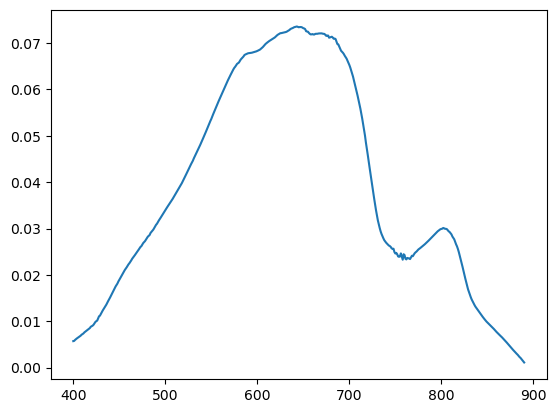

In [91]:
rrs1df = pd.DataFrame(rrs1, columns = l1[0])
rrs2df = pd.DataFrame(rrs2, columns = l2[0])
rrs2df.iloc[5,:].plot()
# rrs2df

In [79]:
solar = pd.read_csv('/Users/jakravit/Desktop/JPL_hyper_ML_project/thuillier.csv',index_col='wl')
hicoL = pd.read_csv('/Users/jakravit/Desktop/JPL_hyper_ML_project/hico_lambda.csv')
hicosrfnc = netCDF4.Dataset('/Users/jakravit/Desktop/JPL_hyper_ML_project/iss_hico_RSR.nc')
# print(f.variables.keys())

lam = hicosrfnc['wavelength'][:]
r = hicosrfnc['RSR'][:]
srf = pd.DataFrame(r, index=hicoL.values[:,0], columns=lam.astype(np.float32))
hicoSRF = srf.T
hicoSRF = hicoSRF.loc[:,404.08:896.688]

def hico_srf(spec, solar, srf):
    name = spec.name
    merged = pd.merge(pd.merge(srf, solar,right_index=True, left_index=True), spec, right_index=True, left_index=True)
    rrs_res = []
    for l in hicoSRF.columns.values:        
        merged['numerator'] = merged.apply(lambda row: (row[l]*row[name]*row['Ed']), axis=1)
        merged['denominator'] = merged.apply(lambda row: (row[l]*row['Ed']), axis=1)
        rrs_res.append(merged.numerator.sum()/merged.denominator.sum())
    return rrs_res

In [80]:
newrrs1 = rrs1df.T.apply(lambda row: hico_srf(row,solar,hicoSRF))
newrrs1 = newrrs1.T
newrrs1.columns = hicoSRF.columns

newrrs2 = rrs2df.T.apply(lambda row: hico_srf(row,solar,hicoSRF))
newrrs2 = newrrs2.T
newrrs2.columns = hicoSRF.columns

In [87]:
newrrs1
newrrs2

,404.080,409.808,415.536,421.264,426.992,432.720,438.448,444.176,449.904,455.632,...,845.136,850.864,856.592,862.320,868.048,873.776,879.504,885.232,890.960,896.688
0,0.003160,0.003520,0.003989,0.004548,0.005350,0.006491,0.007788,0.009177,0.010534,0.011773,...,0.001901,0.001652,0.001444,0.001259,0.001086,0.000922,0.000777,0.000661,0.000576,0.000515
1,0.004158,0.004625,0.005225,0.005916,0.006833,0.008077,0.009458,0.010917,0.012339,0.013642,...,0.001823,0.001537,0.001298,0.001084,0.000885,0.000700,0.000541,0.000419,0.000333,0.000276
2,0.002486,0.002797,0.003216,0.003742,0.004531,0.005677,0.006981,0.008367,0.009711,0.010938,...,0.002038,0.001764,0.001538,0.001339,0.001156,0.000983,0.000831,0.000710,0.000621,0.000557
3,0.006237,0.006968,0.007884,0.008924,0.010343,0.012275,0.014356,0.016498,0.018593,0.020547,...,0.011291,0.009771,0.008435,0.007190,0.005985,0.004832,0.003822,0.003039,0.002487,0.002115
4,0.006305,0.007073,0.008032,0.009118,0.010591,0.012574,0.014683,0.016839,0.018948,0.020925,...,0.011828,0.010240,0.008835,0.007525,0.006261,0.005055,0.004000,0.003183,0.002608,0.002222
5,0.006462,0.007224,0.008173,0.009242,0.010678,0.012615,0.014688,0.016813,0.018893,0.020842,...,0.011308,0.009802,0.008475,0.007237,0.006037,0.004887,0.003876,0.003089,0.002533,0.002157
6,0.007863,0.008765,0.009869,0.011088,0.012710,0.014875,0.017185,0.019567,0.021907,0.024097,...,0.009256,0.008008,0.006930,0.005928,0.004953,0.004012,0.003179,0.002528,0.002065,0.001752
7,0.007883,0.008680,0.009665,0.010767,0.012260,0.014321,0.016607,0.019041,0.021470,0.023749,...,0.007149,0.006223,0.005431,0.004688,0.003954,0.003234,0.002588,0.002076,0.001708,0.001455
8,0.006915,0.007617,0.008489,0.009475,0.010824,0.012695,0.014775,0.016997,0.019221,0.021308,...,0.006367,0.005531,0.004825,0.004167,0.003516,0.002877,0.002302,0.001846,0.001518,0.001293
9,0.005981,0.006613,0.007428,0.008382,0.009724,0.011624,0.013776,0.016104,0.018443,0.020637,...,0.006756,0.005890,0.005157,0.004471,0.003790,0.003122,0.002523,0.002047,0.001702,0.001465
